In [2]:
%pip install matplotlib json-repair

Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
from json_repair import repair_json
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
sample_message = """{"message_id": 31329, "text": "expande tu imagen ! ! ! ! ! ! ! ! ! si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar", "label": 1, "label_text": "spam", "subject": "expande tu imagen ! ! ! ! ! ! ! ! !", "message": "si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar\n", "date": "2005-01-19"}"""
sample_messaage = repair_json(sample_message)
sample_message_json = json.loads(sample_messaage)
formatted_message_json = json.dumps(sample_message_json, indent=2)
print(formatted_message_json)

{
  "message_id": 31329,
  "text": "expande tu imagen ! ! ! ! ! ! ! ! ! si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar",
  "label": 1,
  "label_text": "spam",
  "subject": "expande tu imagen ! ! ! ! ! ! ! ! !",
  "message": "si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repb

In [5]:
# Count elements in test.jsonl
test_list = []
with open('test.jsonl', 'r') as f:
    for line in f:
        test_item = json.loads(repair_json(line))
        test_list.append(test_item)


# Count elements in train.jsonl
train_list = []
with open('train.jsonl', 'r') as f:
    for line in f:
        train_item = json.loads(repair_json(line))
        train_list.append(train_item)

print(f"Number of elements in test.jsonl: {len(test_list)}")
print(f"Number of elements in train.jsonl: {len(train_list)}")

Number of elements in test.jsonl: 2000
Number of elements in train.jsonl: 31716


In [6]:

# Count label_text values in test set
test_label_counts = Counter()
for item in test_list:
    label = item.get('label_text', 'unknown')
    test_label_counts[label] += 1

# Count label_text values in train set
train_label_counts = Counter()
for item in train_list:
    label = item.get('label_text', 'unknown')
    train_label_counts[label] += 1

# Display statistics
print("=" * 60)
print("TEST SET STATISTICS")
print("=" * 60)
print(f"Total messages: {len(test_list)}")
for label, count in sorted(test_label_counts.items()):
    percentage = (count / len(test_list)) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

print("\n" + "=" * 60)
print("TRAIN SET STATISTICS")
print("=" * 60)
print(f"Total messages: {len(train_list)}")
for label, count in sorted(train_label_counts.items()):
    percentage = (count / len(train_list)) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

print("\n" + "=" * 60)
print("COMBINED STATISTICS")
print("=" * 60)
combined_total = len(test_list) + len(train_list)
print(f"Total messages: {combined_total:,}")

# Combine counts
combined_counts = Counter()
for label in set(list(test_label_counts.keys()) + list(train_label_counts.keys())):
    combined_counts[label] = test_label_counts[label] + train_label_counts[label]

for label, count in sorted(combined_counts.items()):
    percentage = (count / combined_total) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

# Verify totals match
print("\n" + "=" * 60)
print("VERIFICATION")
print("=" * 60)
test_sum = sum(test_label_counts.values())
train_sum = sum(train_label_counts.values())
combined_sum = sum(combined_counts.values())

print(f"Test labels sum: {test_sum:,} (matches count: {test_sum == len(test_list)})")
print(f"Train labels sum: {train_sum:,} (matches count: {train_sum == len(train_list)})")
print(f"Combined sum: {combined_sum:,} (matches total: {combined_sum == combined_total})")


TEST SET STATISTICS
Total messages: 2000
  ham: 992 (49.60%)
  spam: 1,008 (50.40%)

TRAIN SET STATISTICS
Total messages: 31716
  ham: 15,553 (49.04%)
  spam: 16,163 (50.96%)

COMBINED STATISTICS
Total messages: 33,716
  ham: 16,545 (49.07%)
  spam: 17,171 (50.93%)

VERIFICATION
Test labels sum: 2,000 (matches count: True)
Train labels sum: 31,716 (matches count: True)
Combined sum: 33,716 (matches total: True)


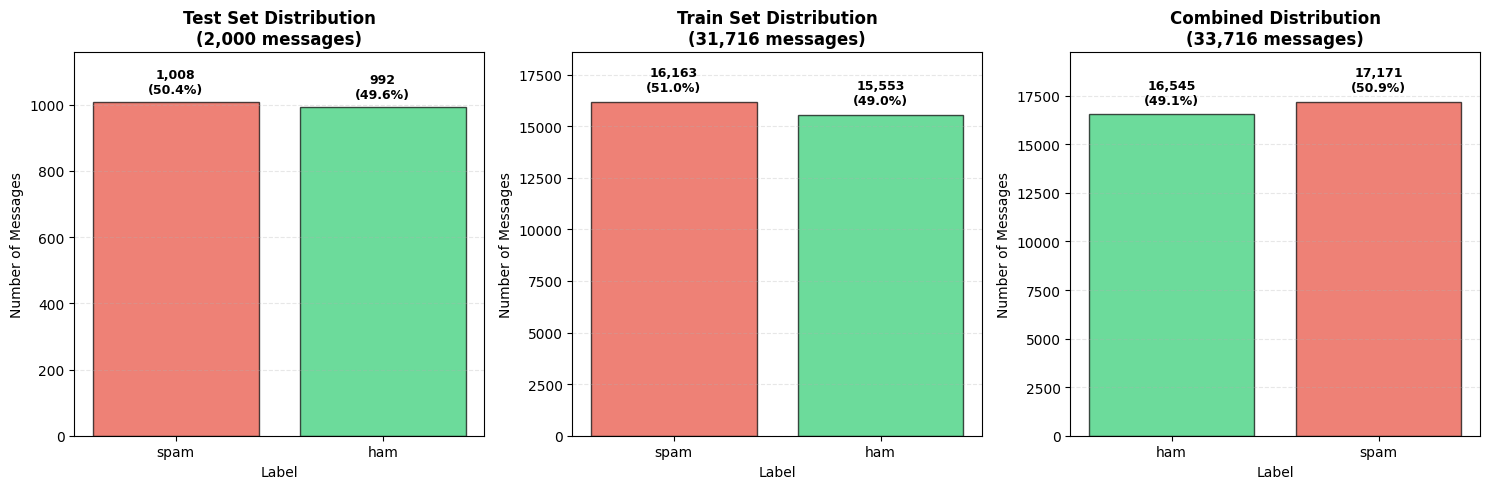

✓ Graphs saved as 'enron_dataset_distribution.png'


In [7]:

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Test Set Graph
test_labels = list(test_label_counts.keys())
test_values = list(test_label_counts.values())
test_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in test_labels]

axes[0].bar(test_labels, test_values, color=test_colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Test Set Distribution\n(2,000 messages)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Messages', fontsize=10)
axes[0].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(test_labels, test_values)):
    percentage = (value / len(test_list)) * 100
    axes[0].text(i, value + 20, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[0].set_ylim(0, max(test_values) * 1.15)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Train Set Graph
train_labels = list(train_label_counts.keys())
train_values = list(train_label_counts.values())
train_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in train_labels]

axes[1].bar(train_labels, train_values, color=train_colors, alpha=0.7, edgecolor='black')
axes[1].set_title('Train Set Distribution\n(31,716 messages)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Messages', fontsize=10)
axes[1].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(train_labels, train_values)):
    percentage = (value / len(train_list)) * 100
    axes[1].text(i, value + 400, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[1].set_ylim(0, max(train_values) * 1.15)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Combined Set Graph
combined_labels = list(combined_counts.keys())
combined_values = list(combined_counts.values())
combined_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in combined_labels]

axes[2].bar(combined_labels, combined_values, color=combined_colors, alpha=0.7, edgecolor='black')
axes[2].set_title('Combined Distribution\n(33,716 messages)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Number of Messages', fontsize=10)
axes[2].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(combined_labels, combined_values)):
    percentage = (value / combined_total) * 100
    axes[2].text(i, value + 400, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[2].set_ylim(0, max(combined_values) * 1.15)
axes[2].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('enron_dataset_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Graphs saved as 'enron_dataset_distribution.png'")


In [ ]:
def build_vocab(corpus):
    """
    Build a vocabulary from a corpus of email items.
    
    Args:
        corpus: List of dictionaries containing email data with 'text' attribute
    
    Returns:
        vocab: Dictionary mapping words to unique integer IDs
    """
    vocab = {}
    for email_item in corpus:
        # Get the text field from the email item
        email_text = email_item.get('text', '')
        
        # Split the text into words and build vocab
        for word in email_text.split():
            if word not in vocab:
                vocab[word] = len(vocab)
    
    return vocab

# Build vocabulary from training dataset
print("Building vocabulary from training dataset...")
vocab = build_vocab(train_list)

print(f"\nVocabulary Statistics:")
print(f"  Total unique words: {len(vocab):,}")
print(f"\nFirst 20 words in vocabulary:")
for i, (word, idx) in enumerate(list(vocab.items())[:20]):
    print(f"  '{word}': {idx}")
print("  ...")


Building vocabulary from training dataset...

Vocabulary Statistics:
  Total unique words: 154,295

First 20 words in vocabulary:
  'any': 0
  'software': 1
  'just': 2
  'for': 3
  '15': 4
  '$': 5
  '-': 6
  '99': 7
  'understanding': 8
  'oem': 9
  'lead': 10
  'me': 11
  'not': 12
  'into': 13
  'temptation': 14
  ';': 15
  'i': 16
  'can': 17
  'find': 18
  'the': 19
  ...


: 

In [ ]:
from pprint import pprint

def vectorize(email_item, vocab):
    """
    Convert an email item to a binary vector representation.
    
    Args:
        email_item: Dictionary containing email data with 'text' attribute
        vocab: Dictionary mapping words to unique integer IDs
    
    Returns:
        v: Binary vector where v[i] = 1 if word i appears in email, 0 otherwise
    """
    v = [0] * len(vocab)
    email_text = email_item.get('text', '')
    
    for word in email_text.split():
        if word in vocab:
            v[vocab[word]] = 1
    
    return v

# Vectorize training emails
print("Vectorizing training emails...")
train_vectors = [vectorize(email_item, vocab) for email_item in train_list]

# Vectorize test emails
print("Vectorizing test emails...")
test_vectors = [vectorize(email_item, vocab) for email_item in test_list]

print("\n" + "=" * 60)
print("VECTORIZATION STATISTICS")
print("=" * 60)
print(f"Vocabulary size: {len(vocab):,} unique words")
print(f"Vector dimension: {len(train_vectors[0]):,} columns")
print(f"\nTraining set:")
print(f"  Total emails: {len(train_vectors):,}")
print(f"  Vector shape: ({len(train_vectors):,}, {len(train_vectors[0]):,})")
print(f"\nTest set:")
print(f"  Total emails: {len(test_vectors):,}")
print(f"  Vector shape: ({len(test_vectors):,}, {len(test_vectors[0]):,})")

# Show sample of first few words
print("\n" + "=" * 60)
print("VOCABULARY SAMPLE (First 30 words)")
print("=" * 60)
word_list = list(vocab.keys())[:30]
print(word_list)

# Show example: first email vectorized
print("\n" + "=" * 60)
print("EXAMPLE: First Training Email")
print("=" * 60)
first_email = train_list[0]
first_vector = train_vectors[0]

print(f"Label: {first_email.get('label_text', 'unknown')}")
print(f"Subject: {first_email.get('subject', 'N/A')[:60]}...")
print(f"\nText preview (first 200 chars):")
print(first_email.get('text', '')[:200] + "...")
print(f"\nVector stats:")
print(f"  Total dimensions: {len(first_vector):,}")
print(f"  Non-zero values: {sum(first_vector):,}")
print(f"  Sparsity: {(1 - sum(first_vector)/len(first_vector))*100:.2f}%")

# Show which words are present in the first email
words_in_email = [word for word in first_email.get('text', '').split() if word in vocab]
print(f"\nFirst 20 words found in vocab: {words_in_email[:20]}")


Vectorizing training emails...
